### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？


--自变量是文字与打印墨色是否一致。因变量是说出墨色名称的时间。--

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

根据实验的[介绍](https://en.wikipedia.org/wiki/Stroop_effect),假设集是一列文字全体。零假设是识别一致文字条件和不一致文字条件的时间一样长。备择假设是识别不一致文字条件的时间不等。

零假设:  H0:Uc-Ui>=0

备择假设: H1:Uc-Ui≠0

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
# 在这里执行你的分析
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


集中趋势
均值：一致组14.05 不一致组22.01
中位数：一致组14.35 不一致组21.01

离散趋势：
极差：一致组13.69 不一致组19.57
标准差：一致组3.56 不一致组4.80

一致组的数据分布较为集中，不一致组较为分散


(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

In [3]:
# 在这里创建可视化图表
%matplotlib inline
import matplotlib.pyplot as plt

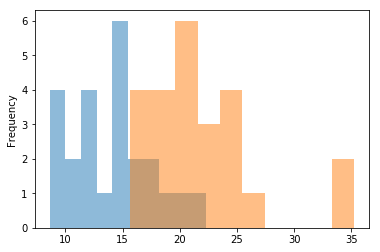

In [4]:
df['Congruent'].plot(kind = 'hist',alpha=0.5)
df['Incongruent'].plot(kind = 'hist',alpha=0.5)    

--根据两组数据的直方图对比可以发现，一致组的用时普遍较少，分布在8s-22s之间，而不一致组的用时较多，分布于16s-35s之间。--

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

选定 α=0.05
进行双尾检验的Z值是+-1.96

根据检验来自两个的两组样本平均数的差异性的Z值[计算公式](https://blog.csdn.net/ch1209498273/article/details/78313883)，
![](http://wiki.mbalib.com/w/images/math/1/4/f/14f14e3e14c24d47ab2de44782670c21.png)
实际上由基本的检验公式推导而来：

从而判断它们各自代表的总体的差异是否显著。

In [5]:
Uc=14.051125;
Ui=22.015917;
Sc=3.559358**2;
Si=4.97057**2;
nc=ni=24

In [6]:
Uc-Ui

-7.964792000000001

In [7]:
(Sc/nc+Si/ni)**0.5

1.2479248691505165

In [10]:
Z=-7.964792000000001/1.2479248691505165;
Z

-6.382429100416734

In [11]:
Z<-1.96

True

所以检验结果是，拒绝原假设。接受备择假设，即识别不一致文字条件的时间与识别一致文字的时间不等。同时我们可以看到由于样本计算值Z=-6.38远远小于单边Z的临界值1.65.所以本题接受的备择假设为：Uc-Ui<0,即可以认为识别一致文字时间要小于识别不一致文字的时间。

而追究其原因，[维基百科](https://en.wikipedia.org/wiki/Stroop_effect#Experimental_findings)有很多理论解释，大意是大脑处理文字的速度要比识别颜色的速度更快（识别颜色需要更多的注意力），在文字颜色一致的情况下，两边没有形成干扰，所以处理速度更快。而在不一致的情况下，文字优于颜色的识别，所以造成了困惑，延长了时间。